In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import model_to_dot, plot_model

import IPython
from IPython.display import SVG

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [2]:
NUM_CLASSES = 12

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [4]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 25)                1075      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 12)                192       
                                                                 
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


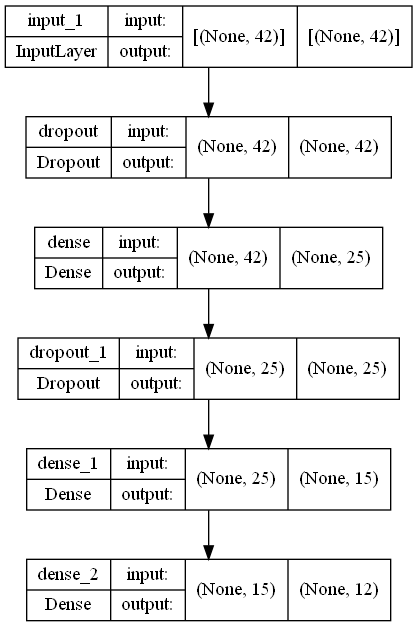

In [5]:
plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
53/81 [==================>...........] - ETA: 0s - loss: 2.4282 - accuracy: 0.1509
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 3s 8ms/step - loss: 2.3715 - accuracy: 0.1646 - val_loss: 2.1520 - val_accuracy: 0.2391
Epoch 2/1000
42/81 [==============>...............] - ETA: 0s - loss: 2.1389 - accuracy: 0.2310
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 2.0650 - accuracy: 0.2464 - val_loss: 1.7633 - val_accuracy: 0.4301
Epoch 3/1000
45/81 [===============>..............] - ETA: 0s - loss: 1.8227 - accuracy: 0.3201
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 2ms/step - loss: 1.7502 - accuracy: 0.3404 - val_loss: 1.3947 - val_accuracy: 0.5461
Epoch 4/1000
46/81 [================>.............] - ETA: 0s - loss: 1.5449 - accuracy: 0.4215
E

43/81 [==============>...............] - ETA: 0s - loss: 0.6147 - accuracy: 0.7669
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7653 - val_loss: 0.1692 - val_accuracy: 0.9872
Epoch 56/1000
45/81 [===============>..............] - ETA: 0s - loss: 0.5854 - accuracy: 0.7753
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7706 - val_loss: 0.1617 - val_accuracy: 0.9852
Epoch 57/1000
42/81 [==============>...............] - ETA: 0s - loss: 0.5909 - accuracy: 0.7803
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.7751 - val_loss: 0.1633 - val_accuracy: 0.9890
Epoch 58/1000
46/81 [================>.............] - ETA: 0s - loss: 0.5891 - accuracy: 0.7802
Epoch 58

42/81 [==============>...............] - ETA: 0s - loss: 0.5235 - accuracy: 0.8047
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.8063 - val_loss: 0.1332 - val_accuracy: 0.9925
Epoch 110/1000
81/81 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8064
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.8064 - val_loss: 0.1374 - val_accuracy: 0.9896
Epoch 111/1000
41/81 [==============>...............] - ETA: 0s - loss: 0.5249 - accuracy: 0.8133
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
81/81 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.8125 - val_loss: 0.1467 - val_accuracy: 0.9916
Epoch 112/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5027 - accuracy: 0.8168
Ep

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

27/27 [==============================] - 0s 885us/step - loss: 0.1325 - accuracy: 0.9945


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.2382797e-06 1.9431530e-01 2.3304692e-08 2.1270420e-12 7.6322372e-05
 6.1688796e-12 1.1358045e-05 2.3047632e-02 7.8254014e-01 9.1833252e-10
 8.1656806e-11 3.2294768e-11]
8


# 混同行列

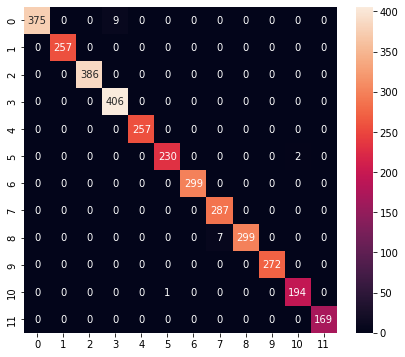

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       384
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       386
           3       0.98      1.00      0.99       406
           4       1.00      1.00      1.00       257
           5       1.00      0.99      0.99       232
           6       1.00      1.00      1.00       299
           7       0.98      1.00      0.99       287
           8       1.00      0.98      0.99       306
           9       1.00      1.00      1.00       272
          10       0.99      0.99      0.99       195
          11       1.00      1.00      1.00       169

    accuracy                           0.99      3450
   macro avg       0.99      0.99      0.99      3450
weighted avg       0.99      0.99      0.99      3450



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Epic9\AppData\Local\Temp\tmp09a1r7p9\assets


6768

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2382816e-06 1.9431506e-01 2.3304697e-08 2.1270427e-12 7.6322307e-05
 6.1688922e-12 1.1358068e-05 2.3047673e-02 7.8254026e-01 9.1833269e-10
 8.1656966e-11 3.2294771e-11]
8
